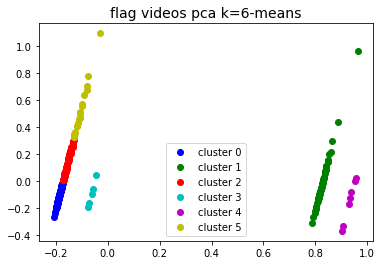

<Figure size 432x288 with 0 Axes>

In [79]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

source_df = pd.read_csv("./dataset/2021-11-12_flag_videos_datasets.csv")
numerical_df = source_df.select_dtypes(include=['number'])

numerical_df = numerical_df.fillna(numerical_df.median())
numerical_df.drop(['No.'], axis=1, inplace=True)
numerical_df.drop(['DeadEndCount'], axis=1, inplace=True)
numerical_df.drop(['renaiflagCount'], axis=1, inplace=True)
numerical_df.drop(['viewCount'], axis=1, inplace=True)

import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
standardization_df = pd.DataFrame(scaler.fit_transform(numerical_df), 
                                  index=numerical_df.index, columns=numerical_df.columns)

std_values = standardization_df.values

from sklearn.cluster import KMeans
k = 6
seed = 1
clusters_videos = KMeans(n_clusters=k, random_state=seed).fit_predict(std_values)
standardization_df['cluster'] = clusters_videos

from sklearn.decomposition import PCA
pca_transformer = PCA(n_components=2)
pca_values = pca_transformer.fit_transform(std_values)

pca_values_df = pd.DataFrame(pca_values)
pca_values_df = pca_values_df.rename(columns={0: "pca_x", 1: "pca_y"})
pca_values_df['cluster'] = clusters_videos

color_list = ['b', 'g', 'r', 'c', 'm', 'y']
import matplotlib.pyplot as plt
for i in range(0, k):
    plt.scatter(x='pca_x', y='pca_y', data=pca_values_df[pca_values_df.cluster == i], c=color_list[i], label='cluster ' + str(i))
plt.title('flag videos pca k=6-means', fontsize=14)
plt.legend()
plt.show()
plt.savefig("flag_videos_pca.png", format="png", dpi=300)

save_df = pd.concat([source_df['title'], standardization_df, pca_values_df], axis=1)


save_df.to_csv("flag_videos_pca.csv")

In [80]:
save_df

,title,likeCount,dislikeCount,commentCount,shibouflagCount,seizonflagCount,cluster,pca_x,pca_y,cluster
0,〇〇フラグが立ったらどうすればいいのか？【初投稿】【アニメ】【漫画】,0.239642,0.114040,0.222391,1.0,0.0,2,-0.165462,0.038555,2
1,【漫画】ゾンビに噛まれた時の対処法【アニメ】【漫画】,0.134391,0.119559,0.030226,1.0,0.0,0,-0.185774,-0.097944,0
2,【漫画】テロ組織を味方につけた一般乗客の大逆転劇【アニメ】【漫画動画】,0.119589,0.087676,0.039176,1.0,0.0,0,-0.188988,-0.124462,0
3,【漫画】進化直後の主人公に直面してしまったらどうなるのか【アニメ】【漫画動画】,0.082769,0.069896,0.010638,1.0,0.0,0,-0.195198,-0.169318,0
4,【漫画】戦いで食い止める役になったらどうすればいいのか【アニメ】【漫画動画】,0.070708,0.047210,0.007937,1.0,0.0,0,-0.198198,-0.192931,0
...,...,...,...,...,...,...,...,...,...,...
399,生きたまま大蛇に飲み込まれるとどうなるのか？【アニメ】【漫画動画】,0.068180,0.052115,0.050659,1.0,0.0,0,-0.195187,-0.172474,0
400,男女が密室で24時間監視されるとどうなるのか？【アニメ】【漫画動画】,0.064590,0.025138,0.051503,1.0,0.0,0,-0.197654,-0.192927,0
401,【脳内メーカー】美少女の頭の中が実はヤバい件......【アニメ】【漫画動画】,0.051680,0.023299,0.043566,1.0,0.0,0,-0.199330,-0.204691,0
402,休みを無駄にしてしまう人の特徴 #shorts【アニメ】【漫画動画】,0.036705,0.022685,0.001689,1.0,0.0,0,-0.203289,-0.231354,0


In [73]:
pca_values_df

,pca_x,pca_y,cluster
0,-0.164390,0.038983,3
1,-0.189119,-0.077303,0
2,-0.196153,-0.115510,0
3,-0.205939,-0.164921,0
4,-0.215169,-0.212896,0
...,...,...,...
399,-0.214853,-0.212367,0
400,-0.218412,-0.232519,0
401,-0.221548,-0.248058,0
402,-0.227794,-0.277847,0


In [76]:
pca_values_df[pca_values_df.cluster == 2]

,pca_x,pca_y,cluster
19,-0.019398,0.790528,2
51,0.001045,0.912270,2
59,-0.069969,0.529899,2
63,-0.083933,0.461785,2
81,-0.089511,0.433467,2
88,0.087275,1.358219,2
93,-0.092141,0.423298,2
104,-0.013069,0.841653,2
126,-0.045244,0.665604,2
135,-0.062449,0.587653,2
